# Monte Carlo Simulation to assess the impact of different empanelment schemes for level 16 and level 17 posts of IRMS.

## **Motivation**
Officers from the Engineering Services and the Civil Services typically have different age
profiles, owing to the distinct nature of their respective recruitment examinations. Given this
systemic age gap between the two cadres, the potential impact of merging these services at
Levels 16 and 17 on the career progression of Civil Services officers remains unclear. This simulation exercise assesses these prospects.

## **Objective**
The objective is to come up with a solution to merging of cadres with different age profiles such that there is equality of opportunity across the services for being considered to higher grades of Level 16 and Level 17.

**The metric that we will use to measure equality of opportunity is the average percentage of candidates in a batch getting into the IRMS grades across cadres.**

----

## **Data**

## As per Gazetted cadre position as on 1.1.2024, the sanctioned strength as per cadre review for each of the services is

| Grade | IRAS |IRSME|IRSE|IRSSE|IRSEE|IRSS|IRTS|IRPS|
| ----- | ---- |-----|----|-----|-----|----|----|----|
|Apex.  |1     |1    |1   |1    |1    |1|      1|1
|HAG+.  |4     |5    |5   |3    |4    |2|      5|2
|HAG.   |40    |50   |85  |39   |42   |29|    42|18
|SAG.   |129   |202  |333 |155  |171|  114|  163|65
|JAG/SG.|283   |483  |857 |348  |450|  278|  391|171
|SS/JS. |365   |608  |677 |425  |406|  226|  497|221





## Exploratory Data Analysis - Cadre wise

### 1. Min, Max, and Average age across Cadres

In [29]:
import pandas as pd
services = ['IRTS', 'IRSE', 'IRAS', 'IRSEE', 'IRPS', 'IRSME', 'IRSSE', 'IRSS']
# Change the base folder accordingly
sheet_folder = "/content/drive/MyDrive/cadre simulation/cleaned data/"

for service in services:
  df = pd.read_excel(f"{sheet_folder}{service}.xlsx")
  df['avg_age'] = df['BatchYear'].astype(int) - df['YOB'].astype(int)
  # Forcing min age to 17 as SCRA officers enter at that age.
  # Max age is set to 35 as per UPSC norms of age of entry for direct officers.
  filtered_age = df[(df['avg_age'] >= 17) & (df['avg_age']<=35)]
  print(f"Average age for {service}: {filtered_age['avg_age'].mean():.2f}, min: {filtered_age['avg_age'].min()}, max: {filtered_age['avg_age'].max()}")

Average age for IRTS: 26.06, min: 21, max: 34
Average age for IRSE: 25.38, min: 20, max: 34
Average age for IRAS: 26.13, min: 22, max: 35
Average age for IRSEE: 24.27, min: 20, max: 32
Average age for IRPS: 26.19, min: 22, max: 32
Average age for IRSME: 22.27, min: 17, max: 32
Average age for IRSSE: 24.02, min: 20, max: 34
Average age for IRSS: 24.61, min: 21, max: 35


### 2. Average age across years and cadres

In [30]:
import pandas as pd

services_to_process = ['IRTS', 'IRSE', 'IRAS', 'IRSEE', 'IRPS', 'IRSME', 'IRSSE', 'IRSS']
sheet_folder = "/content/drive/MyDrive/cadre simulation/cleaned data/"

all_services_avg_age = {}

for service in services_to_process:
    file_path = f"{sheet_folder}{service}.xlsx"
    try:
        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path)

        # Convert 'BatchYear' to numeric, coercing errors
        #df['BatchYear'] = pd.to_numeric(df['BatchYear'], errors='coerce')

        # Drop rows where the 'BatchYear' conversion failed (resulting in NaN)
        #df.dropna(subset=['BatchYear'], inplace=True)

        # Convert 'BatchYear' to integer type
        df['BatchYear'] = df['BatchYear'].astype(int)


        # Remove rows where the 'Batch' column contains the character '(P)'
        df = df[~df['BATCH'].astype(str).str.contains('(P)', regex=False)]

        # Group by 'BatchYear' and compute the average of 'avg_age'
        average_age_by_batch = df.groupby('BatchYear')['avg_age'].mean()

        # Store the result in the dictionary
        all_services_avg_age[service] = average_age_by_batch

    except FileNotFoundError:
        print(f"File not found for {service}: {file_path}")
    except KeyError as e:
        print(f"Column not found in {service} data: {e}")
    except Exception as e:
        print(f"An error occurred while processing {service}: {e}")

# Combine the results into a single DataFrame
combined_avg_age_df = pd.DataFrame(all_services_avg_age)

# Display the combined DataFrame
print("\nAverage age by Batch Year for all services:")
pd.set_option('display.float_format', '{:.1f}'.format)
display(combined_avg_age_df)


Average age by Batch Year for all services:


,IRTS,IRSE,IRAS,IRSEE,IRPS,IRSME,IRSSE,IRSS
BatchYear,,,,,,,,
1990,24.9,23.4,26.6,23.5,25.0,21.0,22.9,24.8
1991,24.9,26.0,25.8,22.8,25.2,20.2,22.5,23.1
1992,26.2,24.5,24.9,23.2,26.2,21.6,23.3,23.6
1993,25.5,24.9,25.1,23.5,27.8,21.2,23.4,23.7
1994,26.2,25.2,24.9,23.2,25.2,22.1,23.8,26.0
1995,25.1,25.4,25.8,23.8,27.0,24.3,22.7,25.4
1996,25.8,25.8,25.5,24.8,25.1,22.1,24.4,25.9
1997,26.2,25.8,26.4,24.2,26.3,25.3,24.1,25.4
1998,25.6,25.7,25.7,24.6,26.1,21.7,24.4,24.6


### 3. Trends of Average age over the years

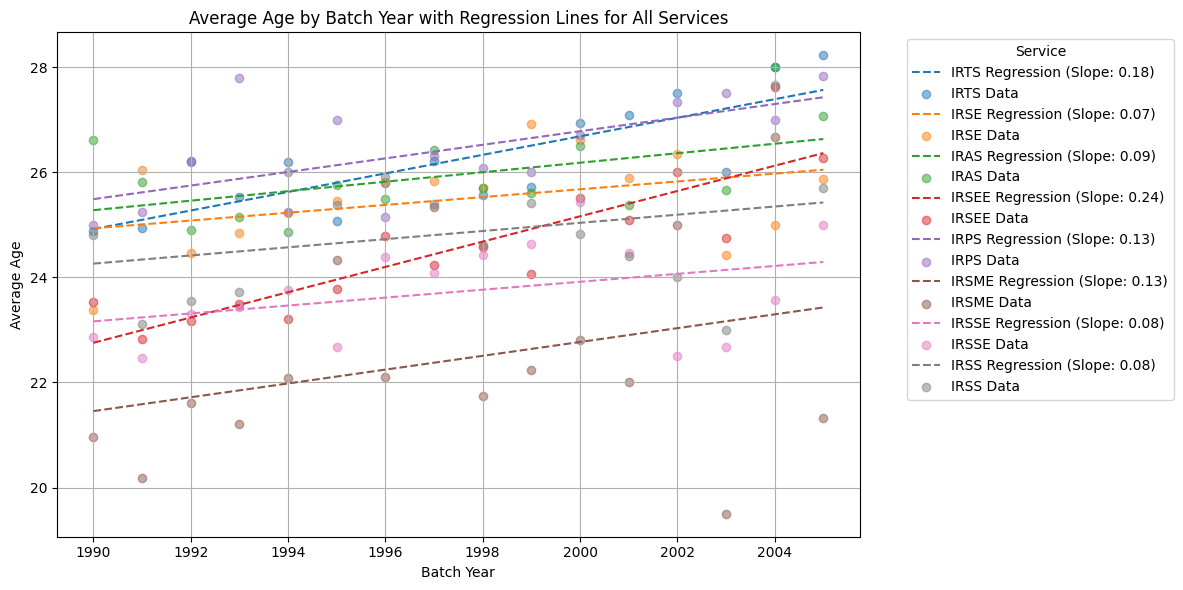

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the combined DataFrame with regression lines
plt.figure(figsize=(12, 6)) # Adjust figure size as needed

for column in combined_avg_age_df.columns:
    # Drop NaN values for regression calculation
    df_subset = combined_avg_age_df[[column]].dropna()
    x = df_subset.index.values
    y = df_subset[column].values

    if len(x) > 1: # Need at least two points to draw a line
        # Calculate linear regression (degree 1 polynomial)
        m, c = np.polyfit(x, y, 1)
        # Add the slope to the label for the legend
        plt.plot(x, m*x + c, linestyle='--', label=f'{column} Regression (Slope: {m:.2f})')

    # Optionally, keep the original data points as scatter plot
    plt.scatter(x, y, label=f'{column} Data', alpha=0.5)


plt.xlabel('Batch Year')
plt.ylabel('Average Age')
plt.title('Average Age by Batch Year with Regression Lines for All Services')
plt.legend(title='Service', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### 4. Age profile trends in IRTS vs other services

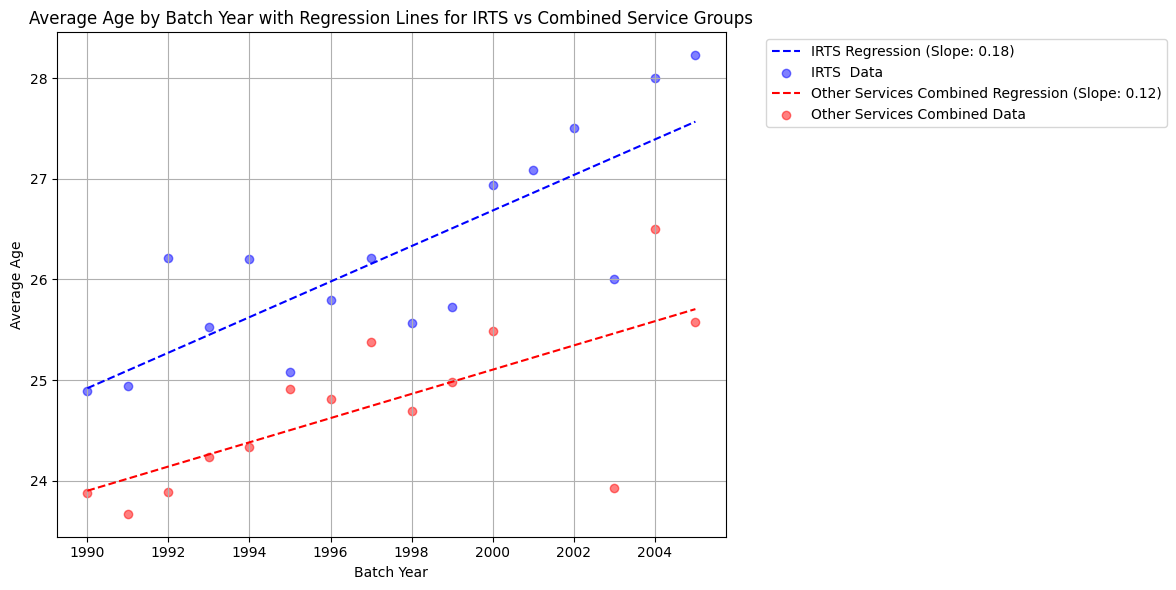

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Define the two groups of services
group1_services = ['IRTS']#, 'IRAS', 'IRPS']
group2_services = [service for service in combined_avg_age_df.columns if service not in group1_services]# and service != 'IRSS']

# Calculate the average age for each group across batch years
# Drop rows with NaN values before calculating the mean for each group
group1_avg_age = combined_avg_age_df[group1_services].dropna().mean(axis=1)
group2_avg_age = combined_avg_age_df[group2_services].dropna().mean(axis=1)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot regression line for Group 1
if len(group1_avg_age.index) > 1:
    x1 = group1_avg_age.index.values
    y1 = group1_avg_age.values
    m1, c1 = np.polyfit(x1, y1, 1)
    plt.plot(x1, m1*x1 + c1, linestyle='--', label=f'IRTS Regression (Slope: {m1:.2f})', color='blue')
    plt.scatter(x1, y1, label='IRTS  Data', alpha=0.5, color='blue')


# Plot regression line for Group 2
if len(group2_avg_age.index) > 1:
    x2 = group2_avg_age.index.values
    y2 = group2_avg_age.values
    m2, c2 = np.polyfit(x2, y2, 1)
    plt.plot(x2, m2*x2 + c2, linestyle='--', label=f'Other Services Combined Regression (Slope: {m2:.2f})', color='red')
    plt.scatter(x2, y2, label='Other Services Combined Data', alpha=0.5, color='red')


plt.xlabel('Batch Year')
plt.ylabel('Average Age')
plt.title('Average Age by Batch Year with Regression Lines for IRTS vs Combined Service Groups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

----
## **Simulation**
1. For better appreciation of the problem, we first demonstrate the impact of age disparity amongst services by looking at the residual service of the first lot of HAG officers across all services.
2. We simulate three alternative models of empanelment - batchwise, HAG, and HAG+1.

### The following two cells have the core code for the simulation. Primarily, the classes for candidates and cadres.

In [33]:
# Setup the imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
###############################################################################

# Common variables
###############################################################################
days_month = {"JAN":31,"FEB":28,"MAR":31,"APR":30,"MAY":31,"JUN":30,"JUL":31,"AUG":31,"SEP":30,"OCT":31,"NOV":30,"DEC":31}

# Draw from a random normal distribution with defined mean, min and max cutoffs
get_ages_truncnorm = lambda lowest,highest,avg,num: np.round(truncnorm(lowest-avg,highest-avg,loc=avg).rvs(size=num)).astype(int)

# Minimum years of service in the grade for consideration to higher grade

HAG_YEARS = 25 # The variable name should have been SAG_YEARS. Apologies.
JAG_YEARS = 17
SS_YEARS = 5
###############################################################################

# Candidate characteristics
###############################################################################
class candidate:
  def __init__(self,Service,age,grade="NA",epoch=0,seniority=0):
    self.Service = Service # Service the candidate belongs to
    self.age = age   # This is the age of entry as on begining of that epoch
    self.mob = np.random.randint(1,13) # randomly decide the month and date of birth
    self.dob = np.random.randint(1,list(days_month.values())[self.mob-1])
    self.grade = grade # The grade that the candidate is currently in
    self.batch = epoch # Batch Number
    self.retirement_epoch = 60-age+epoch # Retirement year/epoch
    self.seniority = seniority # Seniority within the batch
    self.sortcode = f"{self.batch:03d}{self.seniority:03d}" # To ease sorting of candidates by batch and seniority.
    self.ss_stagnation=0
    self.jag_stagnation=0
    self.sag_stagnation=0
    self.hag_stagnation=0
    self.retired=False
    self.irms_month = 0 # The month the candidate enters IRMS
    self.irms_epoch = 0 # The year the candidate enters IRMS
    self.hag_epoch = 0 # The year the candidate enters HAG
    return
###############################################################################

# Cadre parameters
###############################################################################
class cadre:
  def __init__(self,name,ss_posts=428,jag_posts=408,sag_posts=167,hag_posts=43,hagp_posts=4,apex_posts=1,avg=25,lowest=20,highest=35):
    self.name = name # Name of the Cadre/Service
    self.lowestage = lowest # Minimum age of entry as per actuals
    self.highestage = highest # Maximum age of entry as per actuals
    self.avgage = avg # Average age of entry as per actuals
    self.num_ss_posts = ss_posts # Cadre Strength in Senior Scale
    self.num_jag_posts = jag_posts # Cadre strength in JAG
    self.num_sag_posts = sag_posts # Cadre Strength in SAG
    self.num_hag_posts = hag_posts # Cadre strength in HAG
    self.num_hagp_posts = hagp_posts # Cadre strength in HAG Plus
    self.num_apex_posts = apex_posts # Cadre strength in Apex grade
    self.ss_candidates = [] # List of candidates in Senior scale
    self.jag_candidates = [] # List of candidates in JAG
    self.sag_candidates = [] # List of candidates in SAG
    self.hag_candidates = [] # List of candidates in HAG
    self.hagp_candidates =[] # List of candidates in HAG Plus
    self.apex_candidates = [] # List of candidaets in Apex Grade
    self.retired_candidates = [] # List of retired candidates
    self.total_recruitments = 0 # Total recruitment done
    self.batch_candidates = {} # Candidates batch-wise
    return

  def recruit(self,epoch,debug=False):
    if (debug):
      print(f"Epoch {epoch}: Potential to recruit {self.num_ss_posts-len(self.ss_candidates)} candidates")
    # Initialize batch to null list of candidates
    self.batch_candidates[epoch]=[]

    # If there are vacancies in the lowest grade, recruit
    if (len(self.ss_candidates) < self.num_ss_posts):
      seniority = 1

      # Draw from a truncated random normal distribution with cadre specific min, max and average ages.
      for age in get_ages_truncnorm(self.lowestage,self.highestage,self.avgage,num=self.num_ss_posts-len(self.ss_candidates)):
        # Populate ss_candidates list
        self.ss_candidates.append(candidate(self.name,age,"SS",epoch,seniority))
        seniority += 1
        self.total_recruitments += 1
        # Populate the batch
        self.batch_candidates[epoch].append(self.ss_candidates[-1])
    return

  def promoteHAG(self,epoch,debug=False):

    # The number of vacancies
    num_hag_promotions = self.num_hag_posts - len(self.hag_candidates)

    # Only those SAG candidates who have completed 25 years of service are eligible for HAG - XXX TOCHECK if this is as per actual practice.
    eligible_candidates = [c for c in self.sag_candidates if (epoch-c.batch) >=HAG_YEARS]

    if debug:
      print(f"Epoch {epoch}: No of SAG candidates for promotion {len(self.sag_candidates)} with {len(eligible_candidates)} eligible")

    # Start promoting the eligible candidates as per seniority
    if (len(eligible_candidates)>=num_hag_promotions):
      for c in eligible_candidates[:num_hag_promotions]:
        c.grade = "HAG"
        c.hag_epoch = epoch
        self.hag_candidates.append(c)
        self.sag_candidates.remove(c)
      for c in eligible_candidates[num_hag_promotions:]:
        c.sag_stagnation += 1
    else:
      for c in eligible_candidates:
        c.grade = "HAG"
        c.hag_epoch = epoch
        self.hag_candidates.append(c)
        self.sag_candidates.remove(c)
    return

  def promoteSAG(self,epoch,debug=False):

    # The number of vacancies to fill
    num_sag_promotions = self.num_sag_posts - len(self.sag_candidates)

    # Check for completion of requisite years in JAG before promotion to SAG
    eligible_candidates = [c for c in self.jag_candidates if (epoch-c.batch) >=JAG_YEARS]

    if debug:
      print(f"Epoch {epoch}: No of JAG candidates for promotion {len(self.jag_candidates)} with {len(eligible_candidates)} eligible")

    # Promote as per seniority, but only to the extent of available vacancies
    if (len(eligible_candidates)>=num_sag_promotions):
      for c in eligible_candidates[:num_sag_promotions]:
        c.grade = "SAG"
        self.sag_candidates.append(c)
        self.jag_candidates.remove(c)
      for c in eligible_candidates[num_sag_promotions:]:
        c.jag_stagnation += 1
    else:
      for c in eligible_candidates:
        c.grade = "SAG"
        self.sag_candidates.append(c)
        self.jag_candidates.remove(c)
    return

  def promoteJAG(self,epoch,debug=False):

    # The number of vacancies
    num_jag_promotions = self.num_jag_posts - len(self.jag_candidates)

    # Consider only those candidates with requisite years of Service in SS
    eligible_candidates = [c for c in self.ss_candidates if (epoch-c.batch) >=SS_YEARS]

    if debug:
      print(f"Epoch {epoch}: No of SS candidates for promotion {len(self.ss_candidates)} with {len(eligible_candidates)} eligible")

    # Promote as per seniority
    if (len(eligible_candidates)>=num_jag_promotions):
      for c in eligible_candidates[:num_jag_promotions]:
        c.grade = "JAG"
        self.jag_candidates.append(c)
        self.ss_candidates.remove(c)
      for c in eligible_candidates[num_jag_promotions:]:
        c.ss_stagnation += 1
    else:
      for c in eligible_candidates:
        c.grade = "JAG"
        self.jag_candidates.append(c)
        self.ss_candidates.remove(c)
    return


  def promote(self,epoch,month,debug=False):

    # Criteria for promotion
    # 1. Completion of minimum service in the current grade
    # 2. Vacancies in the next higher grade
    # Minimum Service: SS - 5 yrs, JAG/SG - 17 years, HAG - 25 years
    # Promotions start from the top of the pyramid
    if (debug):
      print(f"promoting for epoch {epoch}, month {month}")
    self.promoteHAG(epoch,debug)
    self.promoteSAG(epoch,debug)
    self.promoteJAG(epoch,debug)
    return

  def retire_monthly (self,epoch,month,debug=False):

    # Candidates may retire at any grade. So check for all grades.
    # Check if it is the retirement epoch and retirement month and then
    # Remove the candidate from the in-service lists and add to retired list
    for c in self.ss_candidates.copy():
      if (c.retirement_epoch == epoch) and (c.mob == month):
        c.retired = True
        self.retired_candidates.append(c)
        self.ss_candidates.remove(c)

    for c in self.jag_candidates.copy():
      if (c.retirement_epoch == epoch) and (c.mob == month):
        c.retired = True
        self.retired_candidates.append(c)
        self.jag_candidates.remove(c)

    for c in self.sag_candidates.copy():
      if (c.retirement_epoch == epoch) and (c.mob == month):
        c.retired = True
        self.retired_candidates.append(c)
        self.sag_candidates.remove(c)

    for c in self.hag_candidates.copy():
      if (c.retirement_epoch == epoch) and (c.mob == month):
        c.retired = True
        self.retired_candidates.append(c)
        self.hag_candidates.remove(c)
    return

  # This function is now obsolete
  # XXXX - DO NOT USE. Not verified.
  def retire(self,epoch,debug=False):
    # Retirements happen at all levels
    if debug:
      ss_before = len(self.ss_candidates)
      jag_before = len(self.jag_candidates)
      sag_before = len(self.sag_candidates)
      hag_before = len(self.hag_candidates)

    for c in self.ss_candidates.copy():
      if (60-c.age+c.batch) < epoch:
        c.retired = True
        self.retired_candidates.append(c)
        self.ss_candidates.remove(c)
    for c in self.jag_candidates.copy():
      if (60-c.age+c.batch) < epoch:
        c.retired = True
        self.retired_candidates.append(c)
        self.jag_candidates.remove(c)
    for c in self.sag_candidates.copy():
      if (60-c.age+c.batch) < epoch:
        c.retired = True
        self.retired_candidates.append(c)
        self.sag_candidates.remove(c)
    for c in self.hag_candidates.copy():
      if (60-c.age+c.batch) < epoch:
        c.retired = True
        self.retired_candidates.append(c)
        self.hag_candidates.remove(c)

    if (debug):
      print(f"Epoch {epoch}: Retiring {ss_before-len(self.ss_candidates)} SS candidates, {jag_before-len(self.jag_candidates)} JAG candidates, {sag_before-len(self.sag_candidates)} SAG candidates, {hag_before-len(self.hag_candidates)} HAG candidates")
    return

  def print_metrics(self,epoch):
    print(f"Epoch {epoch}: Metrics for {self.name} with average age {self.avgage}")
    print(f"Total recruitments: {self.total_recruitments}")
    print(f"Total retirements: {len(self.retired_candidates)}")
    print(f"Total in service:{len(self.ss_candidates)+len(self.jag_candidates)+len(self.sag_candidates)+len(self.hag_candidates)}")

    ss_stag = np.mean([c.ss_stagnation for c in self.ss_candidates]+[c.ss_stagnation for c in self.retired_candidates])/12
    jag_stag = np.mean([c.jag_stagnation for c in self.jag_candidates]+[c.jag_stagnation for c in self.retired_candidates])/12
    sag_stag = np.mean([c.sag_stagnation for c in self.sag_candidates]+[c.sag_stagnation for c in self.retired_candidates])/12
    hag_stag = np.mean([c.hag_stagnation for c in self.hag_candidates]+[c.hag_stagnation for c in self.retired_candidates])/12
    print(f"Average stagnation in SS: {ss_stag:.2f} years")
    print(f"Average stagnation in JAG: {jag_stag:.2f} years")
    print(f"Average stagnation in SAG: {sag_stag:.2f} years")
    print(f"Average stagnation in HAG: {hag_stag:.2f} years")

    return (self.name,self.avgage,self.total_recruitments,len(self.retired_candidates),len(self.ss_candidates)+len(self.jag_candidates)+len(self.sag_candidates)+len(self.hag_candidates),ss_stag,jag_stag,sag_stag,hag_stag)

  def dump(self, epoch, level=0):
    print(f"Epoch {epoch}:")
    print(f"\tNo of SS candidates: {len(self.ss_candidates)}")
    print(f"\tNo of JAG candidates: {len(self.jag_candidates)}")
    print(f"\tNo of SAG candidates: {len(self.sag_candidates)}")
    print(f"\tNo of HAG candidates: {len(self.hag_candidates)}")
    print(f"\tNo of Retired candidates: {len(self.retired_candidates)}")
    if (level==1):
      for a in self.ss_candidates:
        print(a.age)
        print(f"Candidate {a.seniority}: Age {a.age}, Grade {a.grade},Batch {a.batch}")
    return

In [34]:
import random

class IRMS:
  def __init__(self,l16_posts=30,l17_posts=8):
    self.l16_posts = l16_posts
    self.l17_posts = l17_posts
    self.l16_candidates = []
    self.l17_candidates = []
    self.current_panel = []
    self.total_recruitments = 0
    self.current_panelbatch = 0

    return

  def empanel_HAG_PLUS_ONE(self,epoch,services,debug=False):
    '''
    # After candidates complete one year in HAG, start empaneling to IRMS.
    # Rules are
    # 1. All candidates of all services completing at least one year in HAG are eligible for empanelment to IRMS.
    # 2. All candidates have equal opportunity to be empaneled.
    # 3. Selection of candidates is not biased towards any particular service.
    # 4. At the time of panel formation, the candidate should have atleast one year residual service as panel is valid for one year.
    # 5. Panel will be formed every year considering the current and anticipated vacancies in the coming year.
    # 6. No extensions beyond 60 years are considered.
    '''


    # First remove all those candidates who are retiring in this epoch
    for c in self.current_panel.copy():
      if c.retirement_epoch == epoch:
        self.current_panel.remove(c)
    for s in services.values():
      if(debug):
        print(f"epoch {epoch}: empaneling for service {s.name}")
      # HAG +1 model
      eligible_candidates = [c for c in s.hag_candidates if c not in self.current_panel and c.retirement_epoch > epoch and c.hag_epoch+1 < epoch]
      self.current_panel.extend(eligible_candidates)
    # Sort the panel as per seniority.
    self.current_panel.sort(key=lambda x: x.sortcode)
    return

  def empanel_HAG_PLUS_ZERO(self,epoch,services,debug=False):

    '''
    # After candidates reach HAG, start empaneling to IRMS.
    # Rules are
    # 1. All candidates of all services entering HAG are eligible for empanelment to IRMS.
    # 2. All candidates of all services have equal opportunity to be empaneled.
    # 3. Selection of candidates is not biased towards any particular service.
    # 4. At the time of panel formation, the candidate should have atleast one year residual service as panel is valid for one year.
    # 5. Panel will be formed every year considering the current and anticipated vacancies in the coming year.
    # 6. No extensions beyond 60 years are considered.
    '''

    # First remove all those candidates who are retiring in this epoch
    for c in self.current_panel.copy():
      if c.retirement_epoch == epoch:
        self.current_panel.remove(c)

    for s in services.values():
      if(debug):
        print(f"epoch {epoch}: empaneling for service {s.name}")
      eligible_candidates = [c for c in s.hag_candidates if c not in self.current_panel and c.retirement_epoch > epoch]
      self.current_panel.extend(eligible_candidates)
    # Sort the panel as per seniority
    self.current_panel.sort(key=lambda x: x.sortcode)
    return

  def anticipated_vacancies(self,epoch):
    l16_anticipated_vacancies = sum(1 for c in self.l16_candidates if c.retirement_epoch == epoch)
    l17_anticipated_vacancies = sum(1 for c in self.l17_candidates if c.retirement_epoch == epoch)
    return l16_anticipated_vacancies + l17_anticipated_vacancies

  def empanel_BATCHWISE(self,epoch,services,debug=False):
    '''
    # Empanel a batch and select from them till there are no more eligible candidates in that batch in which case you pick the next batch and repeat.
    # Rules are
    # 1. Start with the oldest batch and empanel all candidates of all services in that batch who are not due for retirement in the upcoming year.
    # 3. Check if the panel can accommodate the available vacancies and anticipated vacancies arising the upcoming year.
    # 4. If the vacancies can not be filled by that batch candidates, then empanel the next batch and continue till the panel is large enough to fill the anticipated vacancies.
    # 2. No extensions beyond 60 years are considered.
    '''
    for c in self.current_panel.copy():
      if c.retirement_epoch == epoch:
        self.current_panel.remove(c)

    vac = self.l16_posts + self.l17_posts - len(self.l16_candidates) - len(self.l17_candidates)+self.anticipated_vacancies(epoch)
    if debug:
      print(f"vancancies + anticipated vacancies is {vac} and length of panel is {len(self.current_panel)} and panel batch is {self.current_panelbatch}")
    junior_most_batch_in_HAG = 0
    for s in services.values():
      if s.hag_candidates: # Add this check
        junior_most_batch_in_HAG = max(junior_most_batch_in_HAG,max(c.batch for c in s.hag_candidates))

    while (vac > len(self.current_panel)):
      for s in services.values():
        eligible_candidates = [c for c in s.hag_candidates if c not in self.current_panel and c.retirement_epoch > epoch and c.batch == self.current_panelbatch]
        self.current_panel.extend(eligible_candidates)

      if (vac <= len(self.current_panel) or self.current_panelbatch == junior_most_batch_in_HAG):
        if debug:
           if (vac and vac <= len(self.current_panel)):
            print(f"We got enough panel size({len(self.current_panel)}) to cater to {vac} vacancies")
        break
      else:
        # If you dont have enough from the current batch panel, and if there are junior batches in HAG, then give eligibility to empanel that batch
        self.current_panelbatch += 1
        if(debug):
          print(f"Empaneling batch {self.current_panelbatch}, vacancies is {vac} length of panel is {len(self.current_panel)}")
    # We need to sort the panel
    self.current_panel.sort(key=lambda x: x.sortcode)
    if debug:
      #for c in self.current_panel:
      #  print(f"Candidate {c.Service} (Batch: {c.batch}, seniority: {c.seniority}, sortcode {c.sortcode})")
      print(f"Returning with panel length of {len(self.current_panel)} and junior most batch in HAG as {junior_most_batch_in_HAG}")
    return


  def retire_monthly (self,epoch,month,services,debug=False):

    for c in self.l16_candidates.copy():
      if (c.retirement_epoch == epoch) and (c.mob == month):
        c.retired = True
        services[c.Service].retired_candidates.append(c)
        self.l16_candidates.remove(c)
        if(debug):
          print(f"Retiring candidate {c.Service} (Batch: {c.batch}, seniority: {c.seniority}, sortcode {c.sortcode})")
    for c in self.l17_candidates.copy():
      if (c.retirement_epoch == epoch) and (c.mob == month):
        c.retired = True
        services[c.Service].retired_candidates.append(c)
        self.l17_candidates.remove(c)
        if(debug):
          print(f"Retiring candidate {c.Service} (Batch: {c.batch}, seniority: {c.seniority}, sortcode {c.sortcode})")
    return

  def selection_seniority(self,epoch,month,services,debug=False):
    for c in self.current_panel.copy():
      if c.retired:
        self.current_panel.remove(c)
    vacancies = self.l16_posts + self.l17_posts - len(self.l16_candidates) - len(self.l17_candidates)
    if debug:
      print(f"Epoch {epoch}: {vacancies} IRMS vacancies to fill from a panel of {len(self.current_panel)}")
    num_to_select = min(vacancies, len(self.current_panel))
    if num_to_select > 0:
      selected_candidates = self.current_panel[:num_to_select]
      self.total_recruitments += num_to_select

      for c in selected_candidates:
        if len(self.l16_candidates) < self.l16_posts:
          self.l16_candidates.append(c)
          services[c.Service].hag_candidates.remove(c)
          c.grade = "IRMS"
          c.irms_epoch = epoch
          c.irms_month = month
          if debug:
            print(f"Selected {c.Service} candidate (Batch: {c.batch}, Age: {c.age}) for L16")
        elif len(self.l17_candidates) < self.l17_posts:
          self.l17_candidates.append(c)
          services[c.Service].hag_candidates.remove(c)
          c.grade = "IRMS"
          c.irms_epoch = epoch
          c.irms_month = month
          if debug:
            print(f"Selected {c.Service} candidate (Batch: {c.batch}, Age: {c.age}) for L17")
        self.current_panel.remove(c)
    return


  def selection_merit(self,epoch,month,services, debug=False):
    # First check if any panel member retired. If so, remove them from the list
    for c in self.current_panel.copy():
      if c.retired:
        if c in self.l16_candidates:
          print("According to the logic, this should not happen")
          exit()
          self.l16_candidates.remove(c)
          self.current_panel.remove(c)
        elif c in self.l17_candidates:
          print("According to the logic, this should not happen")
          exit()
          self.l17_candidates.remove(c)
          self.current_panel.remove(c)
        else:
          self.current_panel.remove(c)
    # Then assess the vacant posts
    vacancies = self.l16_posts + self.l17_posts - len(self.l16_candidates) - len(self.l17_candidates)

    if debug:
        print(f"Epoch {epoch}: {vacancies} IRMS vacancies to fill from a panel of {len(self.current_panel)}")

    # Select candidates from the panel
    num_to_select = min(vacancies, len(self.current_panel))

    if num_to_select > 0:
        # Randomly select candidates from the current panel
        shuffled_panel = self.current_panel.copy()
        random.shuffle(shuffled_panel)
        #selected_candidates = random.sample(self.current_panel, num_to_select)
        selected_candidates = random.sample(shuffled_panel, num_to_select)

        # Assign selected candidates to L16 and L17 posts (simple assignment for now)
        self.total_recruitments += num_to_select
        for i, candidate in enumerate(selected_candidates):
            if len(self.l16_candidates) < self.l16_posts:
                self.l16_candidates.append(candidate)
                services[candidate.Service].hag_candidates.remove(candidate)
                candidate.grade = "IRMS"
                candidate.irms_month = month
                candidate.irms_epoch = epoch
                if debug:
                    print(f"Selected {candidate.Service} candidate (Batch: {candidate.batch}, Age: {candidate.age}) for L16")
            elif len(self.l17_candidates) < self.l17_posts:
                 self.l17_candidates.append(candidate)
                 services[candidate.Service].hag_candidates.remove(candidate)
                 candidate.grade = "IRMS"
                 candidate.irms_month = month
                 candidate.irms_epoch = epoch
                 if debug:
                    print(f"Selected {candidate.Service} candidate (Batch: {candidate.batch}, Age: {candidate.age}) for L17")

            # Remove selected candidates from the panel
            self.current_panel.remove(candidate)

    return


## 1. Impact of age disparity across cadres.

### code

In [35]:


'''
As per the actual cadre data, the following are the service Characteristics
Average age for IRTS: 26.06, min: 21, max: 34
Average age for IRSE: 25.38, min: 20, max: 34
Average age for IRAS: 26.13, min: 22, max: 35
Average age for IRSEE: 24.27, min: 20, max: 32
Average age for IRPS: 26.19, min: 22, max: 32
Average age for IRSME: 24.37, min: 20, max: 32
# correction here irsme 22.27, min is 17
Average age for IRSSE: 24.02, min: 20, max: 34
Average age for IRSS: 24.61, min: 21, max: 35
'''

Services = {
    "IRSME":cadre("IRSME",ss_posts=608, jag_posts=483, sag_posts=202, hag_posts=50,hagp_posts=5,apex_posts=1,avg=22.27,lowest=17),
    "IRSE":cadre("IRSE",ss_posts=677, jag_posts=857, sag_posts=333, hag_posts=85,hagp_posts=5,apex_posts=1,avg=25.38),
    "IRAS":cadre("IRAS",ss_posts=365, jag_posts=283, sag_posts=129, hag_posts=40,hagp_posts=4,apex_posts=1,avg=26.13),
    "IRSSE":cadre("IRSSE",ss_posts=425, jag_posts=348, sag_posts=155, hag_posts=39,hagp_posts=3,apex_posts=1,avg=24.02),
    "IRSEE":cadre("IRSEE",ss_posts=406, jag_posts=450, sag_posts=171, hag_posts=42,hagp_posts=4,apex_posts=1,avg=24.27),
    "IRSS":cadre("IRSS",ss_posts=226, jag_posts=278, sag_posts=114, hag_posts=29,hagp_posts=2,apex_posts=1,avg=24.61),
    "IRTS":cadre("IRTS",ss_posts=497, jag_posts=391, sag_posts=163, hag_posts=42,hagp_posts=5,apex_posts=1,avg=26.06),
    "IRPS":cadre("IRPS",ss_posts=221, jag_posts=171, sag_posts=65, hag_posts=18,hagp_posts=2,apex_posts=1,avg=26.19)
    }

epoch = 0
# Main Simulation begins here

while epoch < 26:
  for s in Services.values():
    for m in range(1,13):
      s.retire_monthly(epoch,m)
      s.promote(epoch,m)
    s.recruit(epoch)
  epoch += 1


### Plot A: Distribution of residual service amongst civil services and engineering services for the first batch entering HAG.

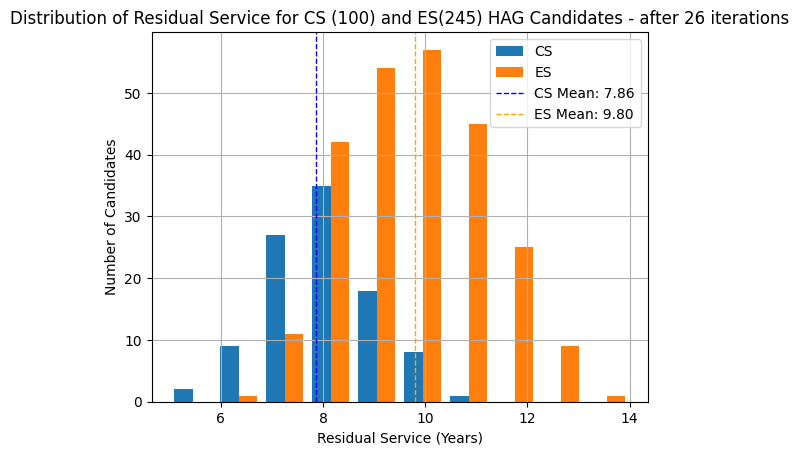

In [36]:
import matplotlib.pyplot as plt
import numpy as np


cs = ['IRAS','IRTS','IRPS']
es = ['IRSME','IRSE','IRSSE','IRSEE','IRSS']

cs_haglist = []
es_haglist = []
for s in cs:
  for c in Services[s].hag_candidates:
    cs_haglist.append(c)

for s in es:
  for c in Services[s].hag_candidates:
    es_haglist.append(c)

cs_residual = [c.retirement_epoch-epoch for c in cs_haglist]
es_residual = [c.retirement_epoch-epoch for c in es_haglist]

plt.grid(True) # This will add a grid with default settings
plt.hist([cs_residual, es_residual], label=['CS', 'ES'])

# Calculate the mean of each group
mean_cs_residual = np.mean(cs_residual)
mean_es_residual = np.mean(es_residual)

# Add vertical lines for the mean
plt.axvline(mean_cs_residual, color='blue', linestyle='dashed', linewidth=1, label=f'CS Mean: {mean_cs_residual:.2f}')
plt.axvline(mean_es_residual, color='orange', linestyle='dashed', linewidth=1, label=f'ES Mean: {mean_es_residual:.2f}')


plt.xlabel("Residual Service (Years)")
plt.ylabel("Number of Candidates")
plt.title(f"Distribution of Residual Service for CS ({len(cs_residual)}) and ES({len(es_residual)}) HAG Candidates - after {epoch} iterations")
plt.legend()
plt.show()

### Plot B: Service wise distribution of top one third of the candidates by residual service.

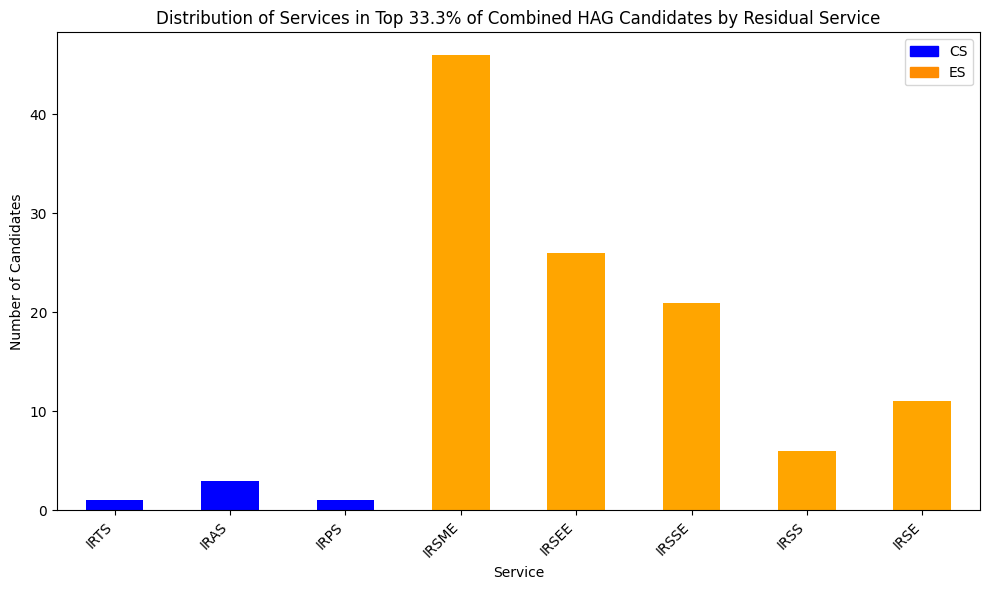

In [37]:
import pandas as pd
# Combine the list and sort as per highest residual age
#combined_list = list((cs_haglist + es_haglist).sort(key=lambda x: (x.retirement_epoch-epoch)*12+x.mob,reverse=True))

# Ensure combined_list is sorted as intended
combined_list = sorted((cs_haglist + es_haglist), key=lambda x: (x.retirement_epoch-epoch)*12+x.mob, reverse=True)

# Extract the desired attributes into a list of dictionaries
data = []
for cand in combined_list:
    data.append({
        'Service': cand.Service,
        'batch': cand.batch,
        'age': cand.age,
        'grade': cand.grade,
        'seniority': cand.seniority,
        'retirement_epoch': cand.retirement_epoch
    })

# Create the DataFrame
df = pd.DataFrame(data)
df['residual_age'] = df['retirement_epoch'].apply(lambda x: x - epoch)

# Calculate the number of candidates for the top 1/3rd
total_candidates = len(combined_list)
top_bottom_n = int(total_candidates * (1/3.0))

# Get the services in the top 33.3%
top_services = [c.Service for c in combined_list[:top_bottom_n]]

# Count the occurrences of each service in the top 33.3%
from collections import Counter
top_service_counts = Counter(top_services)

# Convert to pandas Series and reindex for plotting order
top_counts_series = pd.Series(top_service_counts)
desired_order = ['IRTS', 'IRAS', 'IRPS'] + [service for service in top_counts_series.index if service not in ['IRTS', 'IRAS', 'IRPS']]
top_counts_series = top_counts_series.reindex(desired_order, fill_value=0)

# Define colors based on service category
colors = ['blue' if service in ['IRTS', 'IRAS', 'IRPS'] else 'orange' for service in top_counts_series.index]

# Plot the data
plt.figure(figsize=(10, 6))
bars = top_counts_series.plot(kind='bar', color=colors)

# Create custom legend handles
from matplotlib.patches import Patch
legend_handles = [Patch(color='blue', label='CS'),
                  Patch(color='darkorange', label='ES')]

plt.title('Distribution of Services in Top 33.3% of Combined HAG Candidates by Residual Service')
plt.xlabel('Service')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45, ha='right')
plt.legend(handles=legend_handles)
plt.tight_layout()
plt.show()

## 2. Alternative models of empanelment


### code

In [38]:
# Model0 - Batchwise empanelment
Services_model0 = {
    "IRSME":cadre("IRSME",ss_posts=608, jag_posts=483, sag_posts=202, hag_posts=50,hagp_posts=5,apex_posts=1,avg=22.27,lowest=17),
    "IRSE":cadre("IRSE",ss_posts=677, jag_posts=857, sag_posts=333, hag_posts=85,hagp_posts=5,apex_posts=1,avg=25.38),
    "IRAS":cadre("IRAS",ss_posts=365, jag_posts=283, sag_posts=129,
    hag_posts=40,hagp_posts=4,apex_posts=1,avg=26.13),
    "IRSSE":cadre("IRSSE",ss_posts=425, jag_posts=348, sag_posts=155, hag_posts=39,hagp_posts=3,apex_posts=1,avg=24.02),
    "IRSEE":cadre("IRSEE",ss_posts=406, jag_posts=450, sag_posts=171, hag_posts=42,hagp_posts=4,apex_posts=1,avg=24.27),
    "IRSS":cadre("IRSS",ss_posts=226, jag_posts=278, sag_posts=114, hag_posts=29,hagp_posts=2,apex_posts=1,avg=24.61),
    "IRTS":cadre("IRTS",ss_posts=497, jag_posts=391, sag_posts=163, hag_posts=42,hagp_posts=5,apex_posts=1,avg=26.06),
    "IRPS":cadre("IRPS",ss_posts=221, jag_posts=171, sag_posts=65, hag_posts=18,hagp_posts=2,apex_posts=1,avg=26.19)
    }

# Model 1 - HAG empanelment
Services_model1 = {
    "IRSME":cadre("IRSME",ss_posts=608, jag_posts=483, sag_posts=202, hag_posts=50,hagp_posts=5,apex_posts=1,avg=22.27,lowest=17),
    "IRSE":cadre("IRSE",ss_posts=677, jag_posts=857, sag_posts=333, hag_posts=85,hagp_posts=5,apex_posts=1,avg=25.38),
    "IRAS":cadre("IRAS",ss_posts=365, jag_posts=283, sag_posts=129, hag_posts=40,hagp_posts=4,apex_posts=1,avg=26.13),
    "IRSSE":cadre("IRSSE",ss_posts=425, jag_posts=348, sag_posts=155, hag_posts=39,hagp_posts=3,apex_posts=1,avg=24.02),
    "IRSEE":cadre("IRSEE",ss_posts=406, jag_posts=450, sag_posts=171, hag_posts=42,hagp_posts=4,apex_posts=1,avg=24.27),
    "IRSS":cadre("IRSS",ss_posts=226, jag_posts=278, sag_posts=114, hag_posts=29,hagp_posts=2,apex_posts=1,avg=24.61),
    "IRTS":cadre("IRTS",ss_posts=497, jag_posts=391, sag_posts=163, hag_posts=42,hagp_posts=5,apex_posts=1,avg=26.06),
    "IRPS":cadre("IRPS",ss_posts=221, jag_posts=171, sag_posts=65, hag_posts=18,hagp_posts=2,apex_posts=1,avg=26.19)
    }

# Model 2 - HAG + 1 empanelment
Services_model2 = {
    "IRSME":cadre("IRSME",ss_posts=608, jag_posts=483, sag_posts=202, hag_posts=50,hagp_posts=5,apex_posts=1,avg=22.27,lowest=17),
    "IRSE":cadre("IRSE",ss_posts=677, jag_posts=857, sag_posts=333, hag_posts=85,hagp_posts=5,apex_posts=1,avg=25.38),
    "IRAS":cadre("IRAS",ss_posts=365, jag_posts=283, sag_posts=129, hag_posts=40,hagp_posts=4,apex_posts=1,avg=26.13),
    "IRSSE":cadre("IRSSE",ss_posts=425, jag_posts=348, sag_posts=155, hag_posts=39,hagp_posts=3,apex_posts=1,avg=24.02),
    "IRSEE":cadre("IRSEE",ss_posts=406, jag_posts=450, sag_posts=171, hag_posts=42,hagp_posts=4,apex_posts=1,avg=24.27),
    "IRSS":cadre("IRSS",ss_posts=226, jag_posts=278, sag_posts=114, hag_posts=29,hagp_posts=2,apex_posts=1,avg=24.61),
    "IRTS":cadre("IRTS",ss_posts=497, jag_posts=391, sag_posts=163, hag_posts=42,hagp_posts=5,apex_posts=1,avg=26.06),
    "IRPS":cadre("IRPS",ss_posts=221, jag_posts=171, sag_posts=65, hag_posts=18,hagp_posts=2,apex_posts=1,avg=26.19)
    }


epoch=0
irms_model0 = IRMS()
irms_model1 = IRMS()
irms_model2 = IRMS()

while epoch < 150:
  irms_model0.empanel_BATCHWISE(epoch,Services_model0)
  irms_model1.empanel_HAG_PLUS_ZERO(epoch,Services_model1)
  irms_model2.empanel_HAG_PLUS_ONE(epoch,Services_model2)

  for s in Services_model0.values():
    for m in range(1,13):
      s.retire_monthly(epoch,m)
      irms_model0.retire_monthly(epoch,m,Services_model0)
      irms_model0.selection_merit(epoch,m,Services_model0)
      s.promote(epoch,m)
    s.recruit(epoch)

  for s in Services_model1.values():
    for m in range(1,13):
      s.retire_monthly(epoch,m)
      irms_model1.retire_monthly(epoch,m,Services_model1)
      irms_model1.selection_merit(epoch,m,Services_model1)
      s.promote(epoch,m)
    s.recruit(epoch)

  for s in Services_model2.values():
    for m in range(1,13):
      s.retire_monthly(epoch,m)
      irms_model2.retire_monthly(epoch,m,Services_model2)
      irms_model2.selection_merit(epoch,m,Services_model2)
      s.promote(epoch,m)
    s.recruit(epoch)

  epoch += 1


### Plot A: Average percentage of candidates in a batch getting into IRMS - service wise

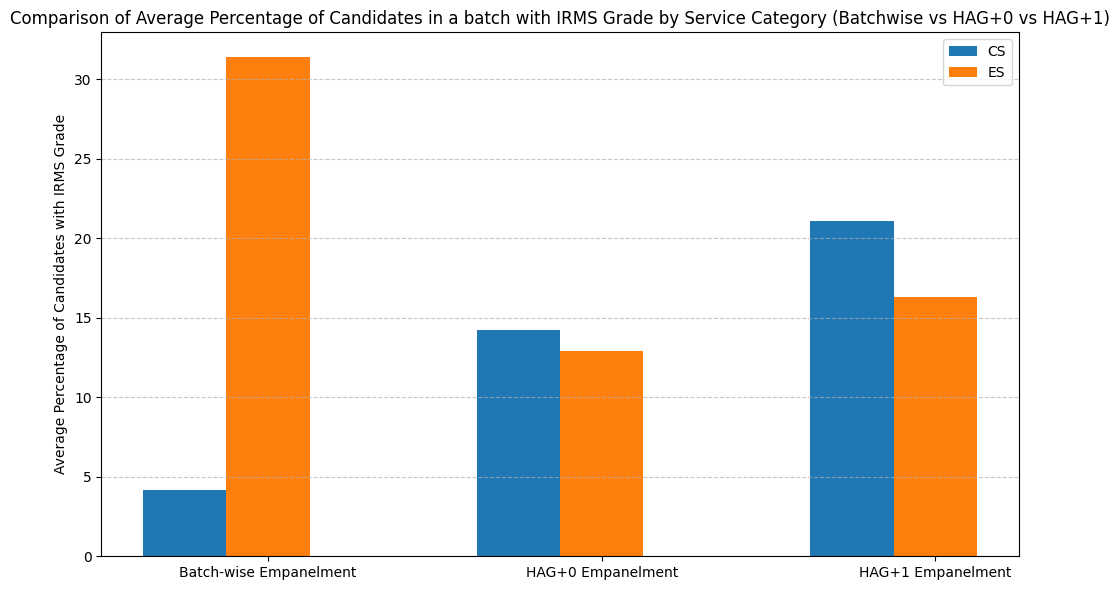

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def get_category_averages(services_model, cs_services):
    cs_percentages = []
    es_percentages = []
    batch_percentages = {}
    epochs_with_no_candidates = {}

    for service_name, service in services_model.items():
        batch_percentages[service_name] = []
        epochs_with_no_candidates[service_name] = 0
        for epoch, candidates in service.batch_candidates.items():
            if epoch < 50:
              continue
            if epoch > 100:
              break
            total_in_batch = len(candidates)
            if total_in_batch > 0:

                irms_in_batch = sum(1 for c in candidates if c.grade == "IRMS")
                percentage = (irms_in_batch / total_in_batch) * 100
                batch_percentages[service_name].append((irms_in_batch,total_in_batch,percentage))
                if service_name in cs_services:
                    cs_percentages.append(percentage)
                else:
                    es_percentages.append(percentage)
            else:
              epochs_with_no_candidates[service_name] += 1
    #print(f"lengths are cs {len(cs_percentages)}, es: {len(es_percentages)}")
        #print(f"Service {service_name} has {epochs_with_no_candidates[service_name]} batches without candidates")
    return batch_percentages, cs_percentages, es_percentages, np.mean(cs_percentages) if cs_percentages else 0, np.mean(es_percentages) if es_percentages else 0

cs_services = ["IRTS", "IRAS", "IRPS"]
# Using Services_model0 as Model 1 and Services_model1 as Model 2 as per user's request
batch_percentages1,cs_percentages1, es_percentages1, cs_avg_model1, es_avg_model1 = get_category_averages(Services_model0, cs_services)
batch_percentages2, cs_percentages2, es_percentages2, cs_avg_model2, es_avg_model2 = get_category_averages(Services_model1, cs_services)
batch_percentages3, cs_percentages3, es_percentages3, cs_avg_model3, es_avg_model3 = get_category_averages(Services_model2, cs_services)

categories = ['CS', 'ES']
model_labels = ['Batch-wise Empanelment', 'HAG+0 Empanelment', 'HAG+1 Empanelment']
average_percentages = [
    [cs_avg_model1, es_avg_model1],
    [cs_avg_model2, es_avg_model2],
    [cs_avg_model3, es_avg_model3]
]

x = np.arange(len(model_labels))
width = 0.25 # Adjusted width to accommodate three sets of bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for CS and ES categories for each model
rects1 = ax.bar(x - width, [average_percentages[0][0], average_percentages[1][0],average_percentages[2][0]], width, label='CS')
rects2 = ax.bar(x, [average_percentages[0][1], average_percentages[1][1],average_percentages[2][1]], width, label='ES')


ax.set_ylabel("Average Percentage of Candidates with IRMS Grade")
ax.set_title("Comparison of Average Percentage of Candidates in a batch with IRMS Grade by Service Category (Batchwise vs HAG+0 vs HAG+1)")
ax.set_xticks(x)
ax.set_xticklabels(model_labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### KS Statistic to see if the difference in averages between CS and ES services are statistically significant



In [40]:
from scipy.stats import ks_2samp
import pandas as pd

# Perform KS test for Model 0
ks_statistic1, p_value1 = ks_2samp(cs_percentages1, es_percentages1)

# Perform KS test for Model 1
ks_statistic2, p_value2 = ks_2samp(cs_percentages2, es_percentages2)

# Perform KS test for Model 2
ks_statistic3, p_value3 = ks_2samp(cs_percentages3, es_percentages3)

# Create a DataFrame to tabulate the results
data = {'Model': ['Batch Empanelment', 'HAG+0 Empanelment', 'HAG +1 Empanelment'],
        'KS Statistic': [ks_statistic1, ks_statistic2, ks_statistic3],
        'P-value': [p_value1, p_value2, p_value3]}
df_ks_results = pd.DataFrame(data)

# Add a column indicating whether to reject the null hypothesis (using alpha=0.05)
alpha = 0.05
df_ks_results['Reject Null Hypothesis (alpha=0.05)'] = df_ks_results['P-value'] < alpha

# Display the table
display(df_ks_results)

,Model,KS Statistic,P-value,Reject Null Hypothesis (alpha=0.05)
0,Batch Empanelment,0.5,0.0,True
1,HAG+0 Empanelment,0.0,1.0,False
2,HAG +1 Empanelment,0.1,0.1,False


**The above results show that the difference between ES and CS in HAG and HAG+1 empanelments is not statistically significant. That is to say, that there is equality of opportunity in these models.**

### Total Candidates across the models - Service wise

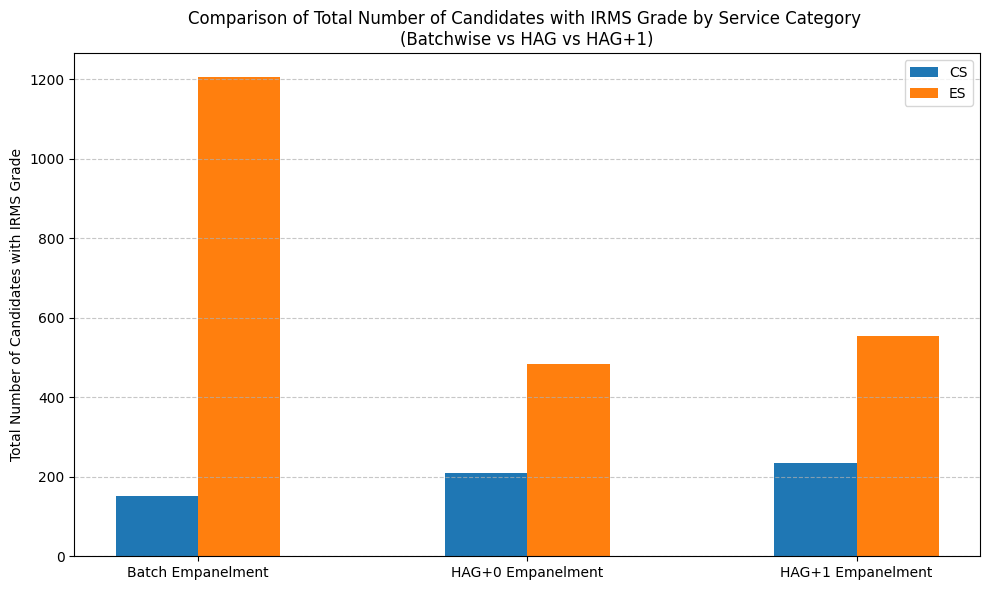

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def get_category_total_irms_candidates(services_model, cs_services):
    cs_count = 0
    es_count = 0
    epoch = 0
    for service_name, service in services_model.items():
        for epoch, candidates in service.batch_candidates.items():
            if epoch <50:
              continue
            if epoch > 100:
              break
            irms_in_batch = sum(1 for c in candidates if c.grade == "IRMS")
            if service_name in cs_services:
                cs_count += irms_in_batch
            else:
                es_count += irms_in_batch

    return cs_count, es_count

cs_services = ["IRTS", "IRAS", "IRPS"]
# Using Services_model0 as Model 1 and Services_model1 as Model 2 as per user's request
cs_total_model1, es_total_model1 = get_category_total_irms_candidates(Services_model0, cs_services)
cs_total_model2, es_total_model2 = get_category_total_irms_candidates(Services_model1, cs_services)
cs_total_model3, es_total_model3 = get_category_total_irms_candidates(Services_model2, cs_services)

categories = ['CS', 'ES']
model_labels = ['Batch Empanelment', 'HAG+0 Empanelment', 'HAG+1 Empanelment']
total_candidates = [
    [cs_total_model1, es_total_model1],
    [cs_total_model2, es_total_model2],
    [cs_total_model3, es_total_model3]
]

x = np.arange(len(model_labels))
width = 0.25 # Adjusted width to accommodate three sets of bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for CS and ES categories for each model
rects1 = ax.bar(x - width/2, [total_candidates[0][0], total_candidates[1][0], total_candidates[2][0]], width, label='CS')
rects2 = ax.bar(x + width/2, [total_candidates[0][1], total_candidates[1][1], total_candidates[2][1]], width, label='ES')

ax.set_ylabel("Total Number of Candidates with IRMS Grade")
ax.set_title("Comparison of Total Number of Candidates with IRMS Grade by Service Category \n(Batchwise vs HAG vs HAG+1)")
ax.set_xticks(x)
ax.set_xticklabels(model_labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**It can be seen that in absolute numbers, Engineering service candidates are more than the Civil Service candidates, in tune with the total cadre strengths of respective Services**

### Discovered Advantage - Increase in the average tenure in IRMS grades

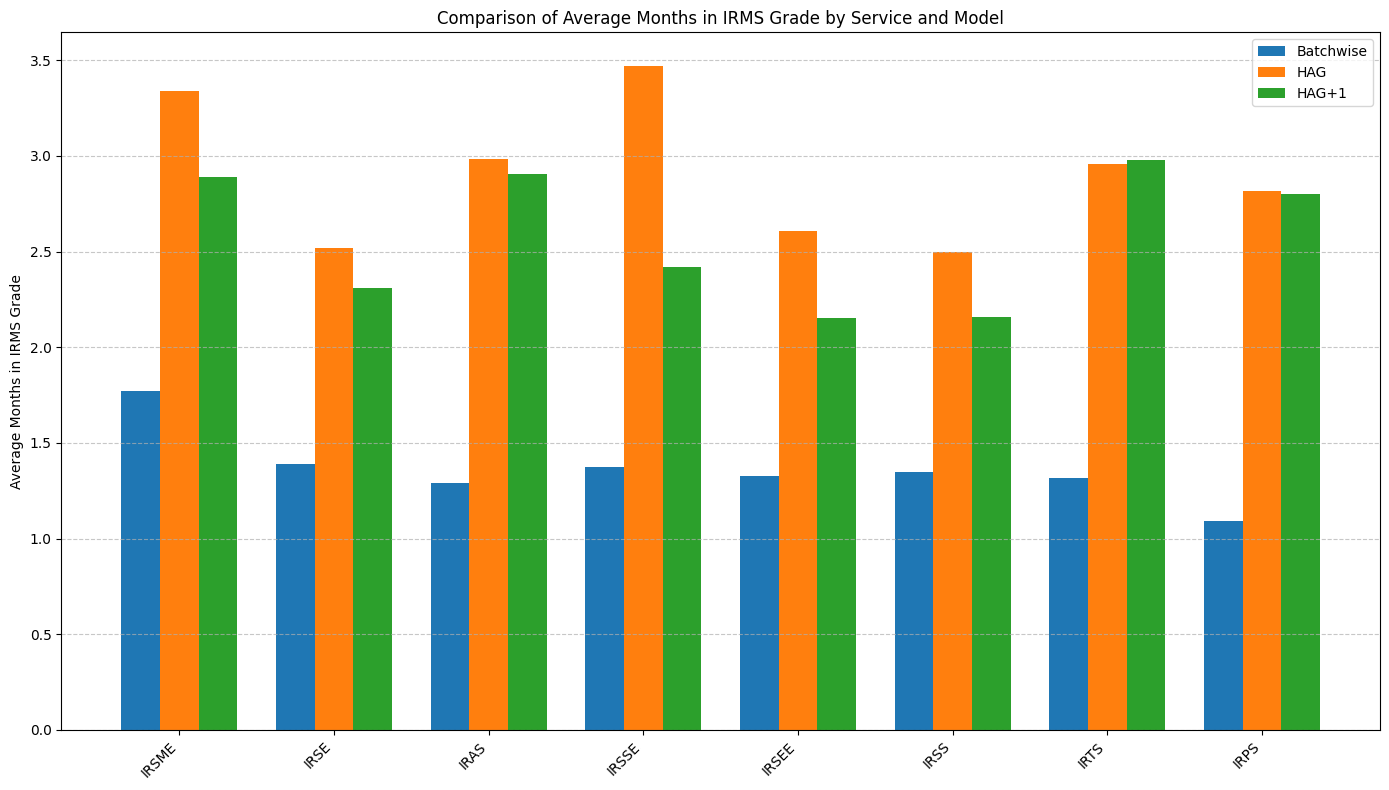

In [42]:
months_in_service0 = {}
for s0 in Services_model0.values():
    total_irms_months_service = 0
    total_irms_candidates_service = 0
    for epoch, candidates in s0.batch_candidates.items():
        if epoch <50:
          continue
        if epoch > 100:
          break
        irms_in_batch = sum(1 for c in candidates if c.grade == "IRMS")
        irms_months_in_batch = sum((c.retirement_epoch - c.irms_epoch) * 12 + c.mob - c.irms_month for c in candidates if c.grade == "IRMS")

        total_irms_months_service += irms_months_in_batch
        total_irms_candidates_service += irms_in_batch

    # Calculate average months in IRMS for the service
    average_irms_months = total_irms_months_service / total_irms_candidates_service if total_irms_candidates_service > 0 else 0
    months_in_service0[s0.name] = (average_irms_months,total_irms_months_service,total_irms_candidates_service)

months_in_service1 = {}
for s1 in Services_model1.values():
    total_irms_months_service = 0
    total_irms_candidates_service = 0
    for epoch, candidates in s1.batch_candidates.items():
        if epoch <50:
          continue
        if epoch > 100:
          break
        irms_in_batch = sum(1 for c in candidates if c.grade == "IRMS")
        irms_months_in_batch = sum((c.retirement_epoch - c.irms_epoch) * 12 + c.mob - c.irms_month for c in candidates if c.grade == "IRMS")
        total_irms_months_service += irms_months_in_batch
        total_irms_candidates_service += irms_in_batch

    # Calculate average months in IRMS for the service
    average_irms_months = total_irms_months_service / total_irms_candidates_service if total_irms_candidates_service > 0 else 0
    months_in_service1[s1.name] = (average_irms_months,total_irms_months_service,total_irms_candidates_service)


months_in_service2 = {}
for s2 in Services_model2.values():
    total_irms_months_service = 0
    total_irms_candidates_service = 0
    for epoch, candidates in s2.batch_candidates.items():
        if epoch <50:
          continue
        if epoch > 100:
          break
        irms_in_batch = sum(1 for c in candidates if c.grade == "IRMS")
        irms_months_in_batch = sum((c.retirement_epoch - c.irms_epoch) * 12 + c.mob - c.irms_month for c in candidates if c.grade == "IRMS")
        total_irms_months_service += irms_months_in_batch
        total_irms_candidates_service += irms_in_batch

    # Calculate average months in IRMS for the service
    average_irms_months = total_irms_months_service / total_irms_candidates_service if total_irms_candidates_service > 0 else 0
    months_in_service2[s2.name] = (average_irms_months,total_irms_months_service,total_irms_candidates_service)


# Get the service names from one of the dictionaries (they should be the same)
service_names = list(months_in_service0.keys())

# Get the average months in IRMS for each model in the same order as service_names
average_months0 = [months_in_service0[name][0]/12 for name in service_names]
average_months1 = [months_in_service1[name][0]/12 for name in service_names]
average_months2 = [months_in_service2[name][0]/12 for name in service_names]

x = np.arange(len(service_names))
width = 0.25 # Adjusted width to accommodate three sets of bars

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x - width, average_months0, width, label='Batchwise')
rects2 = ax.bar(x, average_months1, width, label='HAG')
rects3 = ax.bar(x + width, average_months2, width, label='HAG+1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Months in IRMS Grade')
ax.set_title('Comparison of Average Months in IRMS Grade by Service and Model')
ax.set_xticks(x)
ax.set_xticklabels(service_names, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**The orange and green bars are significantly higher than the blue bars across all services, indicating that the average Tenures in IRMS grades have significantly increased across all services from less than 1.5 years in batchwise empanelment to more than two years in HAG and HAG+1 empanelment.**